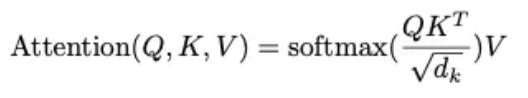
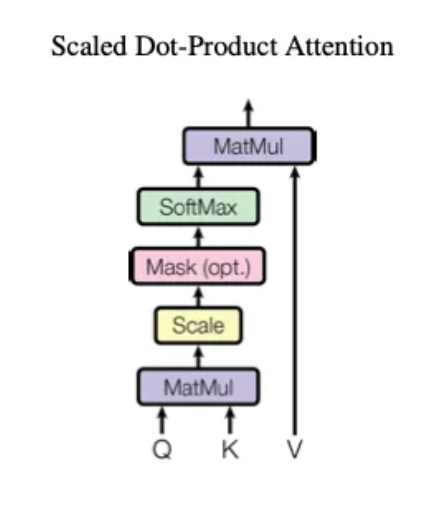

# 步骤 1：创建查询、键和值（Q、K、V）

处理嵌入句子
- 将其拆分成单词
- 为每个单词分配一个唯一的整数值
- 将该整数值映射到固定大小的向量。

In [1]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}
print(int2word)
print(word2int)

vocab_size = len(word2int)

embedding_dim = 3
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

print(sentence)
print(tokens)
print(embeddings)

{0: 'york', 1: 'rangers', 2: 'pittsburgh', 3: 'new', 4: 'last', 5: 'beat', 6: 'the', 7: 'penguins', 8: 'night'}
{'york': 0, 'rangers': 1, 'pittsburgh': 2, 'new': 3, 'last': 4, 'beat': 5, 'the': 6, 'penguins': 7, 'night': 8}
The New York Rangers beat the Pittsburgh Penguins last night
[6, 3, 0, 1, 5, 6, 2, 7, 4, 8]
[[-0.90802408 -1.4123037   1.46564877]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [ 1.57921282  0.76743473 -0.46947439]
 [-0.2257763   0.0675282  -1.42474819]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.54438272  0.11092259 -1.15099358]]


- 计算权重（Q、K、V）
- 权重矩阵中的每一个都乘以嵌入，得到 Q、K 、V

In [2]:
# weights to calculate (Q, K, V)
w_q = np.random.random((embedding_dim, 3))
w_k = np.random.random((embedding_dim, 3))
w_v = np.random.random((embedding_dim, 3))

# calculate (Q, K, V), each as a seperate linear transform of the same input
Q = embeddings @ w_q
K = embeddings @ w_k
V = embeddings @ w_v

print("Embeddings")
print(embeddings)
print("Query")
print(Q)
print("Keys")
print(K)
print("Values")
print(V)

Embeddings
[[-0.90802408 -1.4123037   1.46564877]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [ 1.57921282  0.76743473 -0.46947439]
 [-0.2257763   0.0675282  -1.42474819]
 [ 0.24196227 -1.91328024 -1.72491783]
 [-0.54438272  0.11092259 -1.15099358]]
Query
[[-0.19792569 -0.64670911 -0.83589463]
 [-0.65799892  0.16867186  0.42181354]
 [ 0.36370944  0.71428939  0.5451813 ]
 [-0.25041769  1.2707987   1.4192425 ]
 [-0.64032929 -0.70375206 -0.60353802]
 [-0.19792569 -0.64670911 -0.83589463]
 [ 0.40189263  1.52562306  1.54260163]
 [-0.93495725 -0.82077231 -0.38529496]
 [-2.71119639 -1.11244389 -0.16373353]
 [-0.73329126 -0.98938104 -0.65530458]]
Keys
[[-0.05287143 -0.16562303 -0.99498382]
 [-0.09347117 -0.54298595  0.26281627]
 [ 0.54702344  0.27957607  0.52830191]
 [ 0.57180787 -0.23076217  1.26865266]
 [-0.37710223 -0.51855718 -0.76892018]
 

# 第 2 步：计算注意力分数

- 取 Q 和 K 的点积。
- 将结果除以 K 维数的平方根（由于 K 和 Q 是由同一输入生成的，因此它们的维数与 Q 和 V 相同）。这样做是为了帮助在训练期间保持梯度稳定。
- 然后，我们将结果通过 softmax 运算来产生概率分布。

In [3]:
def softmax(x: np.ndarray, axis: int) -> np.ndarray:
    x = np.exp(x - np.amax(x, axis=axis, keepdims=True))
    return x / np.sum(x, axis=axis, keepdims=True)

# calculate attention scores as dot product between Q and K
scores = Q @ K.T  # (n x n) matrix
print(scores.shape)

# divide by dimensionality of K, and pass through softmax operation
scores = softmax(scores / K.shape[1]**0.5, axis=1)
print("Attention Scores:")
print(scores)

(10, 10)
Attention Scores:
[[0.11271953 0.07105269 0.04273337 0.0360678  0.1196573  0.11271953
  0.02482399 0.11737118 0.23985759 0.12299703]
 [0.07835523 0.10419302 0.09441331 0.10657714 0.09047841 0.07835523
  0.11403326 0.11393941 0.10985949 0.10979549]
 [0.07256758 0.09149424 0.15974152 0.1642408  0.06293115 0.07256758
  0.2346164  0.05767551 0.02665221 0.05751303]
 [0.03552301 0.07593079 0.15731809 0.19772888 0.0345825  0.03552301
  0.37204481 0.04081131 0.01215588 0.03838171]
 [0.09073315 0.06926745 0.03567544 0.03360513 0.10911668 0.09073315
  0.02274308 0.12654751 0.29348966 0.12808874]
 [0.11271953 0.07105269 0.04273337 0.0360678  0.1196573  0.11271953
  0.02482399 0.11737118 0.23985759 0.12299703]
 [0.02516917 0.05481888 0.16627214 0.20627977 0.0209231  0.02516917
  0.45719356 0.02057184 0.00411928 0.01948309]
 [0.07317889 0.06761616 0.03054687 0.03255816 0.09799184 0.07317889
  0.02151246 0.12987865 0.34710959 0.12642848]
 [0.02548372 0.03072442 0.00648234 0.00806936 0.05198

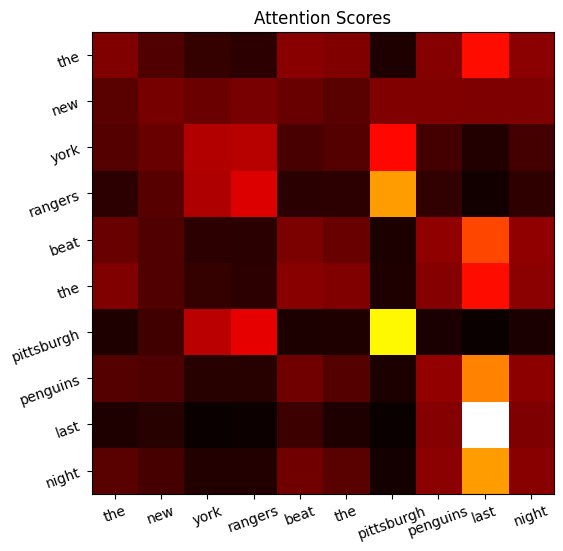

In [4]:
#These scores can also be visualized with a heatmap.
labels = [int2word.get(x) for x in tokens]
ticks = list(range(len(tokens)))

plt.figure(figsize=(15,6))
plt.imshow(scores, cmap="hot")
plt.xticks(ticks, labels, rotation=20)
plt.yticks(ticks, labels, rotation=20)
plt.title("Attention Scores")
plt.show()

# 步骤 3：将注意力分数应用于Values
最后，我们将这些值乘以注意力分数。这里的直觉是保持我们想要关注的单词的值不变，并淹没不相关的单词（通过将它们乘以微小的数字）。

In [5]:
# multiple attention scores with our valuese (V)
# this tells us how much to "attend" to our values
attention_output = scores @ V
attention_output

array([[-0.99241507, -0.73465066, -0.99583692],
       [-0.28671218, -0.20604778, -0.29374835],
       [ 0.31574347,  0.27349947,  0.29522154],
       [ 0.8826674 ,  0.68166444,  0.86355354],
       [-0.99221801, -0.75393683, -0.98982354],
       [-0.99241507, -0.73465066, -0.99583692],
       [ 1.1709221 ,  0.89763814,  1.14967836],
       [-0.99935588, -0.77387315, -0.99282377],
       [-1.25239955, -1.00946583, -1.23273553],
       [-1.07784926, -0.83025143, -1.07199043]])

# Multi-Head Attention

In [6]:
def attention(q: np.ndarray, k: np.ndarray, v: np.ndarray) -> np.ndarray:
    scores = np.dot(q, k.T)
    scores = softmax(scores / k.shape[1]**0.5, axis=1)
    return np.dot(scores, v)
    
def multi_headed_attention(q: np.ndarray,
                           k: np.ndarray,
                           v: np.ndarray,
                           num_heads: int) -> np.ndarray:
    q_heads = np.array_split(Q, num_heads)
    k_heads = np.array_split(K, num_heads)
    v_heads = np.array_split(V, num_heads)
    mha = []  # multi_headed_attention
    for query, keys, values in zip(q_heads, k_heads, v_heads):
        mha.append(attention(query, keys, values))
    mha = np.concatenate(mha)
    return mha

num_heads = 2

# split each of Q, K, V into 'num_heads' chunks
# in reality, Q, K, V are projected 'num_heads' times,
# with each having a dimensionality of d_K / num_heads
Q_heads = np.array_split(Q, num_heads)
K_heads = np.array_split(K, num_heads)
V_heads = np.array_split(V, num_heads)

mha_output = []  # multi_headed_attention
for q, k, v in zip(Q_heads, K_heads, V_heads):
    mha_output.append(attention(q, k, v))

mha_output = np.concatenate(mha_output)

print(f"Multi-Head Attention With {num_heads} Heads:")
print(mha_output)

Multi-Head Attention With 2 Heads:
[[-0.86267201 -0.52705218 -0.90292243]
 [-0.22636789 -0.07485516 -0.26390872]
 [ 0.07565519  0.151631    0.03560656]
 [ 0.39177603  0.37816491  0.35228183]
 [-0.81728505 -0.49933817 -0.85584651]
 [-1.07269062 -0.86309749 -1.05332565]
 [ 1.74994503  1.27333666  1.7462261 ]
 [-1.10360994 -0.90903631 -1.07823942]
 [-1.30174084 -1.07016362 -1.27470439]
 [-1.16649468 -0.95204159 -1.14265843]]


# Transformers
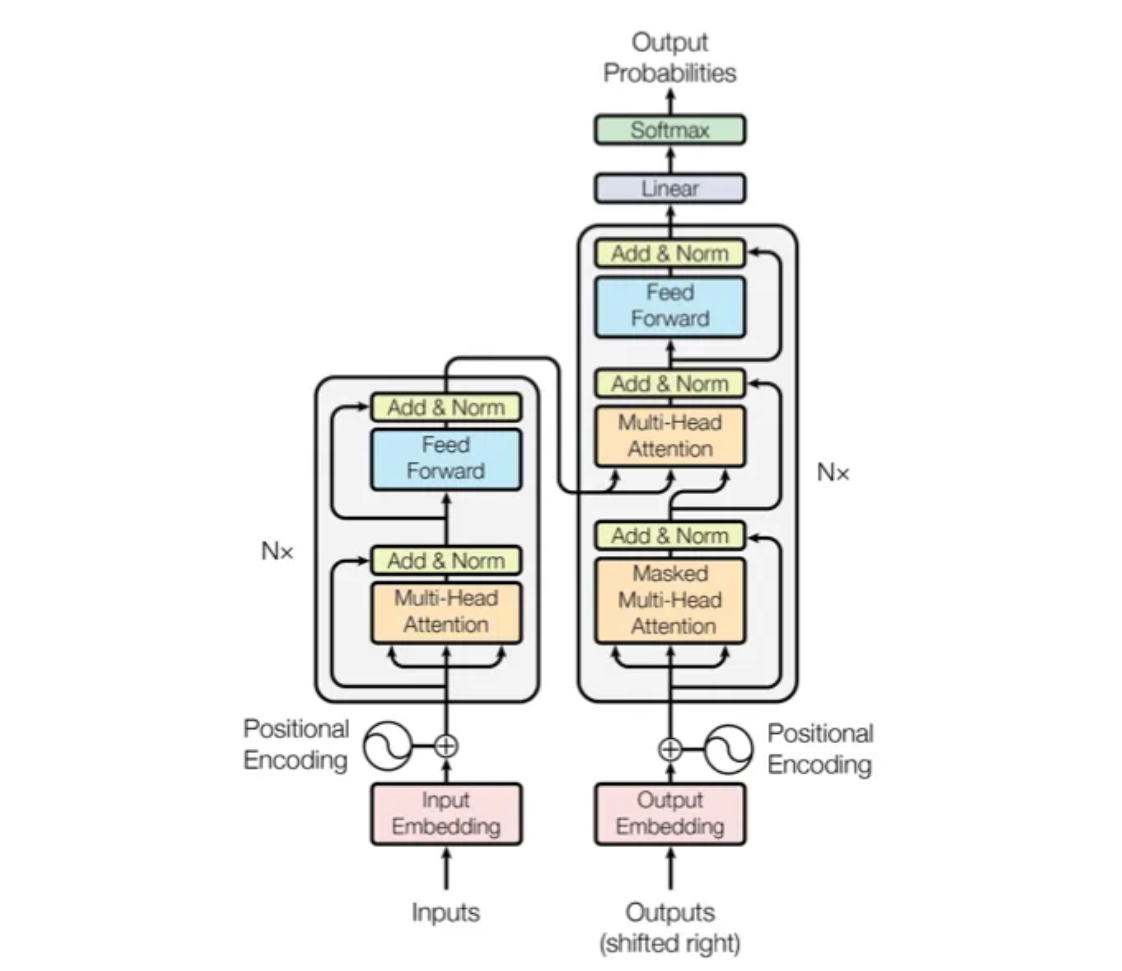

In [7]:
sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}

vocab_size = len(word2int)

embedding_dim = 3
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

def attention(q: np.ndarray, k: np.ndarray, v: np.ndarray) -> np.ndarray:
    scores = np.dot(q, k.T)
    scores = softmax(scores / k.shape[1]**0.5, axis=1)
    return np.dot(scores, v)

def multi_headed_attention(q: np.ndarray,
                           k: np.ndarray,
                           v: np.ndarray,
                           num_heads: int) -> np.ndarray:
    q_heads = np.array_split(Q, num_heads)
    k_heads = np.array_split(K, num_heads)
    v_heads = np.array_split(V, num_heads)
    mha = []  # multi_headed_attention
    for query, keys, values in zip(q_heads, k_heads, v_heads):
        mha.append(attention(query, keys, values))
    mha = np.concatenate(mha)
    return mha

# weights to calculate (Q, K, V)
w_q = np.random.random((embedding_dim, 3))
w_k = np.random.random((embedding_dim, 3))
w_v = np.random.random((embedding_dim, 3))

# calculate (Q, K, V), each as a seperate linear transform of the same input
Q = embeddings @ w_q
K = embeddings @ w_k
V = embeddings @ w_v

mha_output = multi_headed_attention(Q, K, V, num_heads=3)

# add back the original input embeddings
mha_output = mha_output + embeddings

print(f"MHA Input (shape={embeddings.shape}):")
print(embeddings)
print(f"MHA Output (shape={mha_output.shape}):")
print(mha_output)


MHA Input (shape=(10, 3)):
[[-0.41038331  1.17971634 -0.89820794]
 [ 0.58212279  0.88774846  0.89433233]
 [ 0.37569802 -1.00908534 -1.58329421]
 [ 0.77370042 -0.53814166 -1.3466781 ]
 [-1.50815329  1.09964698 -0.17773212]
 [-0.41038331  1.17971634 -0.89820794]
 [-0.88059127 -1.1305523   0.13442888]
 [ 0.83479542  0.29656138 -1.03782988]
 [ 0.7549978  -0.20716589 -0.62347739]
 [-0.07580375  0.97296353  0.79559546]]
MHA Output (shape=(10, 3)):
[[-0.57266597  0.58358079 -1.19368983]
 [ 1.06812249  1.91375037  1.79044603]
 [ 0.05120475 -1.95157811 -2.14163804]
 [ 0.67009207 -1.00707317 -1.54595181]
 [-1.81050595 -0.07461628 -1.18486414]
 [-0.52504972  0.20328751 -1.69116173]
 [-1.18851584 -2.31053282 -0.87885758]
 [ 1.10113153  0.84130393 -0.48394048]
 [ 1.01908663  0.33325599 -0.07233547]
 [ 0.22109281  1.57169327  1.38594566]]


In [8]:
def relu(a):
    return np.maximum(0, a)

ffn_input_shape = mha_output.shape[-1]
ffn_weights_1 = np.random.randn(ffn_input_shape, ffn_input_shape*4)
ffn_weights_2 = np.random.randn(ffn_input_shape*4, ffn_input_shape)

ffn_out = relu(np.dot(mha_output, ffn_weights_1))
ffn_out = np.dot(ffn_out, ffn_weights_2)

ffn_out = ffn_out + mha_output

print(f"FFN Input Shape: {mha_output.shape}")
print(f"FFN Output Shape: {ffn_out.shape}")

FFN Input Shape: (10, 3)
FFN Output Shape: (10, 3)


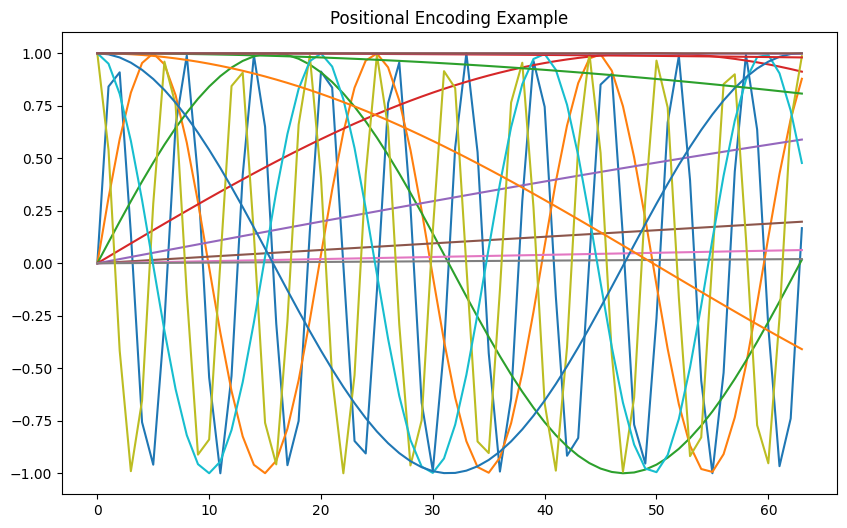

In [9]:
def positional_encoding(length: int, depth: int):
    """
    Positional Encoding as described in 'Attention Is All You Need'
    
    NOTE: 10000 is a user defined scalar.
    """
    assert depth % 2 == 0, "'depth' must be even"
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :] / depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)  10,000 chosen because its sufficiently large
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 
    return pos_encoding

plt.figure(figsize=(10,6))
plt.plot(positional_encoding(64, 16))
plt.title("Positional Encoding Example")
plt.show()

In [10]:
sentence = "The New York Rangers beat the Pittsburgh Penguins last night"

words = sentence.lower().split()

int2word = {k: v for (k, v) in enumerate(set(words))}
word2int = {v: k for (k, v) in int2word.items()}

vocab_size = len(word2int)

embedding_dim = 4
embedding_layer = np.random.randn(vocab_size, embedding_dim)

tokens = [word2int[w] for w in words]

embeddings = np.asarray([embedding_layer[idx] for idx in tokens])

embeddings = embeddings + positional_encoding(*embeddings.shape)
embeddings.shape

(10, 4)

In [11]:
import tensorflow as tf


D:\dev_tool\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
